# **15 plots in plotly**

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# import dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 1. Scatter Plot

In [8]:
fig1=px.scatter(df,x='sepal_length',y='sepal_width',color='species')
fig1.show()

# save the plot
fig1.write_image('./outputs/fig1.png' , scale=3)  

## 2. line plot

In [10]:
# sort the data
df_line=df.sort_values(by='sepal_length')

fig2=px.line(df_line,x='sepal_length',y='sepal_width',color='species')
fig2.show()

# save the plot
fig2.write_image('./outputs/fig2.png' , scale=3)

## 3. Bar plot

In [11]:
# group values based on means
df_group=df.groupby('species').mean().reset_index()
df_group

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [15]:
fig3=px.bar(df_group,x='species',y='sepal_width')
fig3.show()
# save the plot
fig3.write_image('./outputs/fig3.png' , scale=3)

<Axes: xlabel='species', ylabel='sepal_width'>

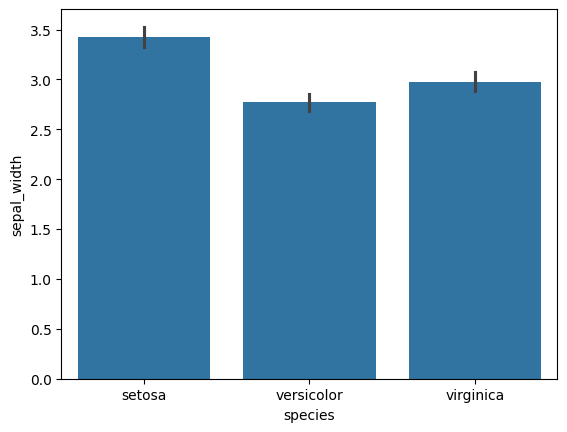

In [14]:
# seaborn does not need to make means groups
sns.barplot(data=df,x='species',y='sepal_width')

## 4. Box plot

In [17]:
fig4=px.box(df,x='species',y='sepal_width', color='species')
fig4.show()

# save the plot
fig4.write_image('./outputs/fig4.png' , scale=3)

## 5. violin plot

In [19]:
fig5=px.violin(df,x='species',y='sepal_width', color='species', box=True)
fig5.show()

# save the plot
fig5.write_image('./outputs/fig5.png' , scale=3)

## 6. Histogram

In [23]:
fig6=px.histogram(df,x='sepal_width', color='species')
fig6.show()

# save the plot
fig6.write_image('./outputs/fig6.png' , scale=3)

## 7. Pie Chart

In [33]:
df['species'].value_counts() # count the number of values

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [34]:
df_pie=df['species'].value_counts().reset_index() # reset_index() is used to convert the series to dataframe
df_pie.columns=['species','count'] # rename the columns	

fig7=px.pie(df_pie,values='count',names='species') # names is the name of the column that contains the labels
fig7.show()

# save the plot
fig7.write_image('./outputs/fig7.png' , scale=3)

## 8. 3D Scatter Plot

In [39]:
fig8=px.scatter_3d(df,x='sepal_length',y='sepal_width',z='petal_width',color='species') # 3d scatter plot
fig8.show()

# save the plot
fig8.write_html('./outputs/fig8.html')

## 9. Area Chart

In [42]:
fig9=px.area(df,x='sepal_width',y='sepal_length',color='species') # area plot 
fig9.show()

# save the plot
fig9.write_image('./outputs/fig9.png' , scale=3)

## 10. Bubble Chart

In [43]:
fig10=px.scatter(df,x='sepal_length',y='sepal_width',color='species',size='petal_length')
fig10.show()

# save the plot
fig10.write_image('./outputs/fig10.png' , scale=3)

## 11. Sunburst Chart

In [46]:
df_sunburst=df.groupby(['species','petal_width']).size().reset_index(name='counts') # group by two columns and count the number of values

fig11=px.sunburst(df_sunburst,path=['species','petal_width'],values='counts') # path is the name of the columns that will be used to create the hierarchy
fig11.show()

# save the plot
fig11.write_html('./outputs/fig11.html')
fig11.write_image('./outputs/fig11.png' , scale=3)

## 12. Parallel Coordinates Plot

In [57]:
# Add a numeric species_id based on species names for coloring
df['species_id'] = df['species'].astype('category').cat.codes

# Parallel Coordinates Plot
fig12 = px.parallel_coordinates(df, color='species_id', labels={'species_id': 'species'}, color_continuous_scale=px.colors.diverging.Tealrose)
fig12.show()

# save the plot in html
fig12.write_html("./outputs/fig12.html")

#save the plot
fig12.write_image("./outputs/fig12.png", scale=3)

## 13. Density Contour Plot

In [59]:
fig13=px.density_contour(df,x='sepal_length',y='sepal_width',color='species')
fig13.show()

# save the plot
fig13.write_image('./outputs/fig13.png' , scale=3)

## 14. Ternary Plot

In [61]:
fig14=px.scatter_ternary(df,a='sepal_length',b='sepal_width',c='petal_width',color='species')
fig14.show()

# save the plot
fig14.write_image('./outputs/fig14.png' , scale=3)

## 15. Polar Chart (Radar Chart)

In [65]:
df_radar=df.groupby('species').mean().reset_index() # group by species and calculate the mean of the other columns

fig15=px.line_polar(df_radar,r='sepal_length',theta='species',line_close=True) # line_close=True is used to close the line
fig15.show()

# save the plot
fig15.write_image('./outputs/fig15.png' , scale=3)

In [64]:
fig15=px.line_polar(df_radar,r='petal_length',theta='species',line_close=True)
fig15.show()